In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [97]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [130]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['species']=l.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [131]:
species_name=l.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [132]:
X = df.drop(columns=['species'])
y = df['species']
X.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [151]:
print(Y[:5])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True, random_state=69)

In [153]:
x_train.shape

(105, 4)

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [155]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [147]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [148]:
model = Sequential()
model.add(Dense(units=32,activation='relu',input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3,activation='softmax'))

In [156]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                160       
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_29 (Dense)            (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
model.fit(x_train, y_train, epochs=200, verbose=4)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [159]:
prediction = model.predict(x_test)
print(prediction[:7])

2/2 [==============================] - 0s 4ms/step
[[9.9999994e-01 5.6693965e-11 1.4924739e-10]
 [4.1747955e-04 9.9868929e-01 8.9308695e-04]
 [9.9999994e-01 1.0621779e-08 1.4359040e-09]
 [1.5550278e-07 5.4064305e-05 9.9994570e-01]
 [9.9999994e-01 4.5730456e-08 3.7865102e-09]
 [9.9999994e-01 7.4243812e-13 1.6633519e-11]
 [5.9686031e-04 9.9643362e-01 2.9694864e-03]]


In [160]:
prediction = np.argmax(prediction,axis=-1)
print(prediction)

[0 1 0 2 0 0 1 2 2 0 1 2 0 1 2 1 1 2 1 2 2 1 0 0 2 0 2 2 1 0 0 0 0 2 2 2 0
 1 1 2 0 2 1 0 1]


In [163]:
print(y_test[:8])

4      0
58     1
20     0
114    2
31     0
33     0
94     1
102    2
Name: species, dtype: int64


In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [165]:
m = confusion_matrix(y_test, prediction)
print(m)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

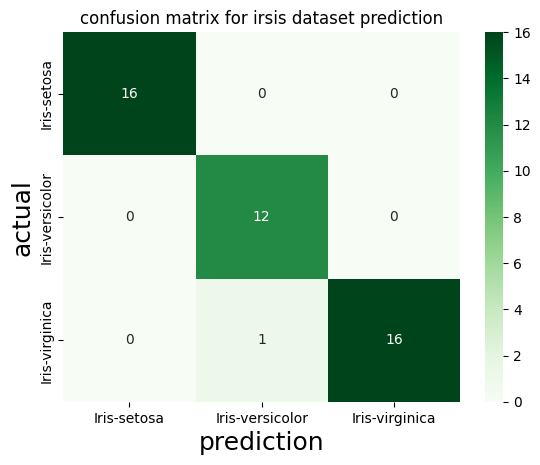

In [168]:
a = sns.heatmap(m, annot=True, fmt='d', cmap='Greens', xticklabels=species_name, yticklabels=species_name)
a.set_title('confusion matrix for irsis dataset prediction')
a.set_xlabel('prediction', fontsize=18)
a.set_ylabel('actual', fontsize=18)